# Livrable 2 : Équipe 2
Willy Carlot(Chef de projet), Corentin Le Nozahic, Leo Vauthier, Ilias Tragha
---



# Contexte

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptees à différents types de territoires.

Notre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisés plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Nous faisons partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer notre activité.


Autrement dit, dans une ère de transition écologie,réduire les émissions de gaz à effet de serre, la congestion urbaine et l'optimisation des ressources liés à la mobilité des personnes et des marchandises sont des defis cruciaux.

Notre structure **CESICDP**, proposons une solution d'optimisation des tournées de véhicules pour minimiser **les** distances parcourues, réduire les coûts logistiques et diminuer l'impact environnemental.

# Objectif

L'objectif de ce projet est de calculer des tournées optimales pour un ou plusieurs véhicules visitant un ensemble de villes avant de retourner au dépot initial, tout en minimisant la distance total.


# Modélisation du problème

Dans l’objectif de limiter les déplacements et la consommation des véhicules, il est nécessaire de modéliser notre problème. Afin de se rapprocher le plus possible de la réalité lors de nos résultats, nous avons choisi de représenter sous la forme d’un graphe $G = (V, E)$ la situation d’une ville connue, **Rouen**, avec :

- $V$ : l’ensemble des **sommets** représentant les intersections de la ville ;
- $E$ : l’ensemble des **arêtes** représentant les routes entre ces intersections.

*Dans le but d'évaluer, prouver et déterminer les limites de notre solution sur des villes plus ou moins denses, avec un grand ou un petit nombre de sommets, nous serons probablement amenés à générer artificiellement des villes*

Sur ce graphe $G$, les intersections sont donc représentées sous forme de sommets, tandis que les routes figureront sous forme d’arêtes.

Dans le cadre de l’amélioration continue, nous avons choisi de prendre en compte deux contraintes :

- **$C1$** : la distance entre les intersections, exprimée par une **pondération** $w : E \rightarrow \mathbb{R}_+$ associée à chaque arête du graphe.De plus, certaines routes peuvent être plus coûteuses ou interdites (par exemple, travaux ou routes bloquées). 

- **$C2$** : la prise en compte d’un **nombre multiple de camions** $n_V$, permettant de faire plusieurs sous-tournées multi-tours plutôt qu’une seule tournée unique.

Ces contraintes ont été choisies car elles sont les plus importantes à prendre en compte vis-a-vis d'une situation réelle. En effet, Les routes barrée et routes avec beaucoup de traffic sont très communes dans les grandes villes. La plupart (voir l'ensemble) des outils de génération d'iténéraires prennent en compte ces contraintes nous avons donc estimés que les $C1$ et $C2$ définies sont les plus intéressentes à mettre en place.

L’objectif de cette etude est de se rapprocher le plus possible d’une **solution viable** ( solution qui s’exécute dans un temps raisonnable ) et **optimisée** ( qui minimise la **somme totale des arêtes parcourues** par l’ensemble des véhicules ), permettant à un ensemble $n_V$ de véhicules de visiter **l’ensemble des points marqués** ( nœuds à desservir ) $M$, tout en revenant au point de départ ( dépot ) $D$.

Dans le cadre de notre étude, nous cherchons un ensemble de sommets :


$TV_0, TV_1, \dots, TV_n$

Décrivant les routes suivies par chaque véhicule, que nous notons globalement $TV$.

Dans le cadre de cett étude nous représentons le problème comme suit :

- $n_v$ : le nombre de véhicules disponibles
- $G = (V, E)$, avec $w : E \rightarrow \mathbb{R}_+$ la fonction de coût associée aux distances
- $D \subseteq V$ : le dépôt (point de départ et d’arrivée de tous les véhicules)
- $M_v \subseteq V$ : l'ensemble des sommets à visiter avec un véhicule pour avoir une solution valide
- $TV_n \subseteq V$, la route du véhicule $n_v \in \{1, ..., n_V\}$, dont la route commence et se termine par son point de départ $D$
- Chaque sommet $M_v \subseteq V \setminus \{D\}$ est visité **exactement une fois** par un unique véhicule (Sauf $D$).
- $k$ est le cardinal de notre graphe

## Fonction objective
Nous cherchons un ensemble de tournées $\{TV_1, ..., TV_{n}\}$ tel que:

- $\sum_{k=1}^{n_v} TV$ contienne l'ensemble des sommets $Mv$

Et que le coût total $w(i, j)$:

- $\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.


# Implémentation et exploitation
Une fois le problème modélisé mathématiquement et étude de la complexitée réalisée, nous en avons conclu que notre problème est NP-complet ce qui signifie qu'une instance de solution à notre problème est vérifiable en un temps polynomiale. Le test de l'ensemble des solutions étant trop couteux en temps et en puissance de calcul, il est nécessaire de faire appel à des méta-heuristiques nous permettant de trouver une solution optimale en un temps raisonnable. De nombreuses méta-heurisques existes et notre ploblème est np-complet on peut donc utiliser l'ensemble de méta-heuristiques existantes pour trouver une solution (même si certainement conviennent naturellement plus que d'autres à notre situation). Cependant chaque méta-heurisque va avoir une efficacitée différente en fonction des nombreux facteurs suivants :
- ses paramètres (comme le nombre d’itérations, nombre de véhicule, paramètres intrinsèque à la maté-heuristique, ...),

- les contraintes propres au problème.

- ainsi que les caractéristiques du graphe (nombre de sommets, nombre d’arêtes, pondérations, arêtes bloquées, etc.).


Nous avons donc sélectionnées 3 méta-heuristiques différentes afin de les comparer et en déduire à l'aide d'une etude expérimentale la mata-heuritique la plus proche d'une solution optimal. 

Afin diversifier nos résultats nous avons choisis de sélectionner un algorithme par trajectoire et deux algorithmes par population car notre situation s'y prête plus aisément(les fourmis utilisant cet algorithme pour trouver la route la plus courte jusqu'a la nourriture). Les trois méta-heuristiques retenues sont la recherche avec tabou, l'algorithme génétique et l'algorithme des colonies de fourmis. 

## Modélisation
Avant de pouvoir rechercher le meilleur chemin sur un graphe, il est nécessaire de modéliser notre situation sous forme de graphe.
Pour cela, nous avons utilisé les bibliothèques RandomGraph et MapGraph, qui permettent de générer des graphes selon plusieurs paramètres :
- Nombre de sommets
- Probabilité d'arrêtes
- Probabilité de route couteuse
- Probabilité de route barrée
Ces graph sont des objets networksx et sont affichée avec pyplot.

De plus afin d'avoir des graphes réalistes et de nous permettre de faire une étude complètes sur nos solutions La bibliothèque "MapGraph" nous génère un graph entre des villes du mondes avec des distances réelles(à vol d'oiseau). Tandis que "RandomGraph" nous permet de faire varier les situations afin de pouvoir analyser les résultats de notre algorithmes avec de grandes variations des paramètres.

### Génération d'un graphe
On commence par importer les dépendances et générer une seed :

In [1]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Une fois l'ensemble des biblothèques importés nous avons la possibilité de générer un graph aléatoire et de l'afficher 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


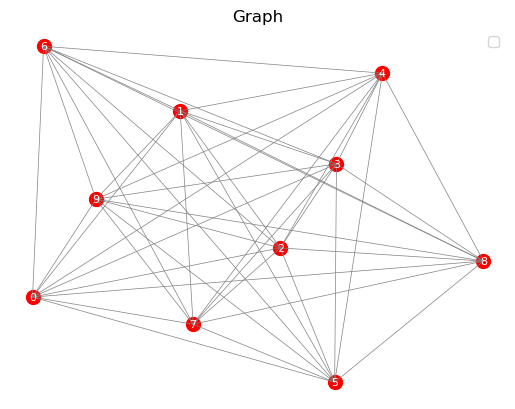

In [2]:
random_graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
random_graph.plot_graph()


#### Propositions d'améliorations
Notre algorihthme semble peut performant temporelement lorsque le nombre d'itération et de nodes augmentent fortement, on devrait se concentrer sur ces problèmes afin d'optimiser notre algorithme, de plus lors de la génération de solution avec de nombreuses arrêtes, le temps d'éxecution explose due à la génération possible de solution impossible, il faudrait limiter l'aléatoire de la génération d'une solution à l'ensemble des solutions possibles afin d'optimiser ce processus. Pour mettre en place cette optimisation il faudrait générer procéduralement notre solution en générant arêtes par arête en vérifiant les arêtes existantes.

De plus nous pouvons générer un graphe entre différentes villes 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


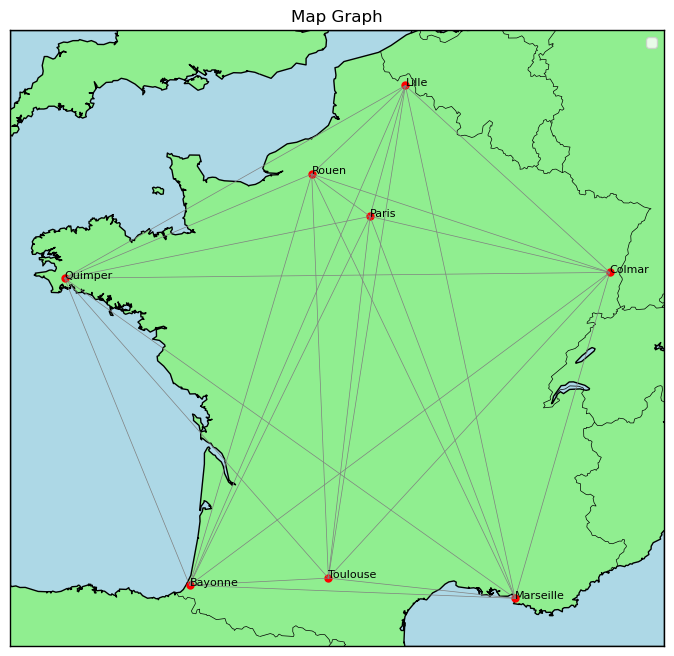

In [3]:
        
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]

graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()


### Filtration

Une fois le graphe généré, nous avons la possibilitée de filtrer ce graphe en y ajoutant une probabilité de route barré ainsi que de route couteuse. Les routes barrés sont représentés en **arêtes rouges fines** tandis que les routes conteuses se distinguent par une **arête rouge épaisse**.


Removed 4 edges of 28
Costed 4 edges of 24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


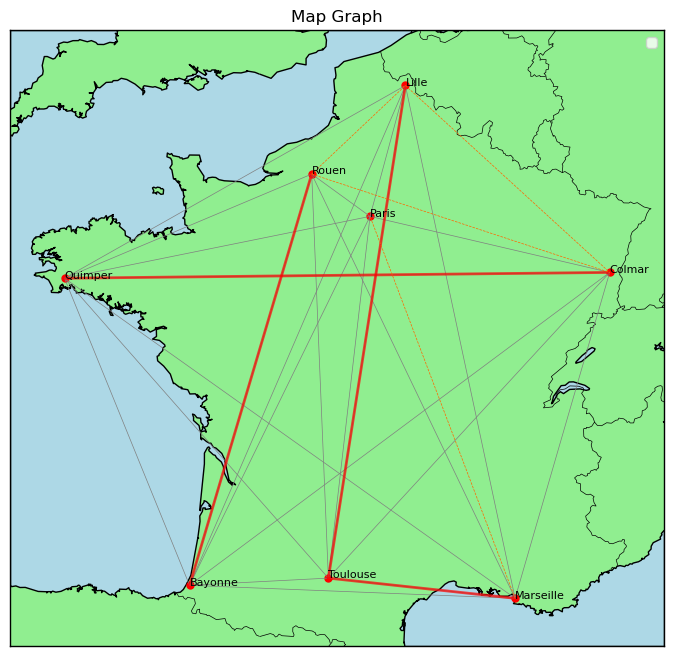

In [4]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

## Métaheuristique 1 : Algorithme Tabou
### Modélisation algorithmique  
L'algorithme de par trajectoire de recherche avec tabou fonctionne de la manière suivante:  

#### Génération d'une solution initiale aléatoire
L’algorithme commence par créer une solution de départ, choisie aléatoirement ou via une heuristique simple. Cette solution représente un point de départ dans l’espace de recherche.

#### Génération des voisins
À partir de cette solution initiale, on génère un ensemble de solutions voisines. Ces voisins sont obtenus en effectuant des modifications mineures sur la solution actuelle (par exemple, échanger deux éléments, déplacer un nœud, etc.).

#### Évaluation des voisins et comparaison
On évalue chaque solution voisine en fonction de notre fonction de coût ($\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.
). L’algorithme identifie la meilleure solution parmi ces voisins (c’est-à-dire celle avec la distance la plus courte sur la somme des véhicules).

Ensuite, cette solution est comparée à celles enregistrées dans la liste tabou :

Si cette solution n’est pas dans la liste tabou, ou si elle est meilleure que la meilleure solution globale trouvée jusque-là, alors elle est acceptée comme nouvelle solution courante.

Elle est ensuite ajoutée à la liste tabou, pour éviter qu’elle ne soit choisie à nouveau pendant un certain nombre d’itérations.

#### Mise à jour de la liste tabou
La liste tabou fonctionne comme une file à durée limitée : après un certain nombre d’itérations , les anciennes solutions sont retirés pour laisser place aux nouvelles. Cela permet de préserver la diversité des solutions explorées.

#### Répétition sur n itération
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, le but est soit de trouver une meilleure solution, soit d’éviter de rester bloqué dans un minimum local grâce à l’interdiction temporaire de certaines solutions.

#### Retour de la meilleure solution trouvée
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il ne s’agit pas nécessairement de la dernière solution visitée, mais de la meilleure connue (enregistrée dans la liste tabou).



### implémentation python
En python, six paramètres ont été défini pour la classe de notre algorithme :
- size_tabou : Taille de la iste tabou qui permet à l'algorihme d'éviter de prendre des chemins déjà empruntés et de permettre une diversification importante
- num_vehicles : nombre de véhicules 
- min_iterations : nombre minimum d'itération
- max_iterations :nombre maximum d'itération
- convergence_threshold : une fois le nombre minimum d'itération dépassé comptele nombre de fois d'affilé ou l'algorithme ne trouve pas une meilleure solution que la solution précédente (ce paramètre permet avec un nombre itération plus grand que le nombre de solution possible d'arrêter l'éxecution)


In [5]:
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot
import time  


def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# Display results for one algorithm
def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    
# Display results for multiple algorithms

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        start_time = time.time()
        run_algorithm(graph, algorithm)
        end_time = time.time()
        duration = end_time - start_time
        print(f"{algorithm.name} terminé en {duration:.2f} sec.\n")

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    # graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100




### Etude expérimentale
#### Plan d’expérience
Pour tester l’efficacité de l’algorithme de recherche avec tabou, nous avons défini plusieurs paramètres importants :

- Le nombre de sommets du graphe

- La probabilité de présence d’arêtes

- La probabilité de routes bloquées

- Le nombre d’itérations de l’algorithme

- La taille de la liste tabou

- Le nombre de véhicule

Nous avons généré plusieurs graphes aléatoires en faisant varier ces paramètres, puis lancé l’algorithme sur chacun d’eux pour observer son comportement. Cela nous a permis de tester différentes configurations et d’en mesurer l’impact sur la qualité de la solution trouvée.



#### Etude d'expérience  :
##### Variation du temps en fonction du nombre d'itérations

Tabu Search - Iterations: 1 of 10, Time: 0.0009999275207519531s
Tabu Search - Iterations: 2 of 10, Time: 0.0019986629486083984s
Tabu Search - Iterations: 3 of 10, Time: 0.002999544143676758s
Tabu Search - Iterations: 4 of 10, Time: 0.006247758865356445s
Tabu Search - Iterations: 5 of 10, Time: 0.008203983306884766s
Tabu Search - Iterations: 6 of 10, Time: 0.01500082015991211s
Tabu Search - Iterations: 7 of 10, Time: 0.023220062255859375s
Tabu Search - Iterations: 8 of 10, Time: 0.021597862243652344s
Tabu Search - Iterations: 9 of 10, Time: 0.02500176429748535s
Tabu Search - Iterations: 10 of 10, Time: 0.031540632247924805s


c:\Users\WC272\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\WC272\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\WC272\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


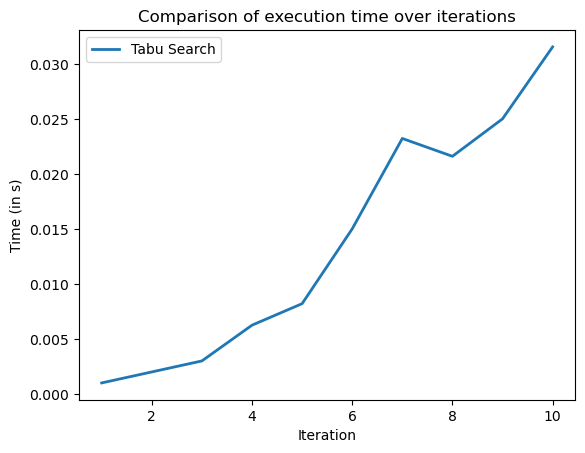

In [6]:
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]



# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

time_over_iterations_comparison(graph=graph,algorithms=algorithms, max_iterations=10, step=1, single_plot=False)

#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results



En tracant un graphe du temps d'execution en fonction du nombre d'itération on remarque que notre le temps d'exécution est expodentielle par rapport au nombre d'itération. **Nous voulons donc réduire un maximum le nombre d'itération afin de limiter grandement le temps d'exécution**.

# Variation du temps en fonction du pourcentage d'arete bloqués

In [7]:
def graph_generator(node=60, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph


def time_vs_blocked_edges(graph_generator, algorithm_class, blocked_percentages, max_iterations, node_count=60):
    times = []
    for p in blocked_percentages:
        try:
            graph = graph_generator(node=node_count, blocked_edge_percentage=p)
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {p}% d'arêtes bloquées : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur à {p}% d'arêtes bloquées : {e}")
            times.append(None) 
    Plot.plot_time_vs_blocked_edges(blocked_percentages, times)


# Exemple d'utilisation
blocked_percentages = [0, 5, 10, 15, 20, 25]
time_vs_blocked_edges(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=1000, num_vehicles=1),
    blocked_percentages=blocked_percentages,
    max_iterations=10000,
    node_count=500  
)


KeyboardInterrupt: 

# Variation du temps en fonction du nombre de sommets

Removed 3 edges of 45
Costed 4 edges of 42
fce26fed-dd0f-4fdf-8eb7-21d11368cf61 - 10 sommets : 1.1514 sec
Removed 17 edges of 190
Costed 17 edges of 173
deec3539-bac9-4e70-9e78-a1b6bcc55b2a - 20 sommets : 9.7629 sec
Removed 40 edges of 435
Costed 39 edges of 395
3d6afa55-db29-4805-bb0b-b54392dace8b - 30 sommets : 37.1395 sec
Removed 74 edges of 780
Costed 70 edges of 706
6e9c230d-d076-4fe1-96db-66113a83b2f8 - 40 sommets : 102.1276 sec
Removed 117 edges of 1225
Costed 110 edges of 1108
82c35071-afda-47ce-afb8-7247db113e00 - 50 sommets : 269.2569 sec
Removed 171 edges of 1770
Costed 159 edges of 1599
4af4b31d-5403-4497-955d-208157fc547d - 60 sommets : 463.3574 sec


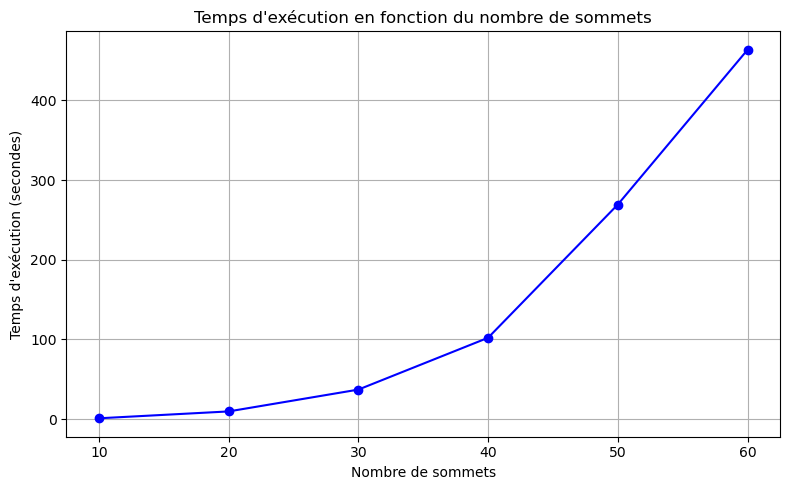

In [ ]:

def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph


def time_vs_node_count(graph_generator, algorithm_class, node_counts, max_iterations, blocked_edge_percentage=0, costly_edge_percentage=0):
    times = []
    for n in node_counts:
        try:
            graph = graph_generator(
                node=n,
                blocked_edge_percentage=blocked_edge_percentage,
                costly_edge_percentage=costly_edge_percentage
            )
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {n} sommets : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec {n} sommets : {e}")
            times.append(None)  
    Plot.plot_time_vs_node_count(node_counts, times)

node_counts = [10, 20, 30, 40, 50]  

time_vs_node_count(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    node_counts=node_counts,
    max_iterations=1000,
    blocked_edge_percentage=10,
    costly_edge_percentage=10
)


Sur ce graphe, on remarque que le nombre de sommets impacte très grandement le temps d'exécution est expodentielle par rapport au nombre de sommet. **Nous voulons donc limiter le nombre de sommet afin de diminuer le temps d'exécution.**

# Variation du temps en fonction de la taille de la liste tabou

Removed 40 edges of 435
Costed 39 edges of 395
a243c96a-f265-4ebf-b509-1d5833af1fb3 - taille liste tabou 1 : 1.7086 sec
Removed 40 edges of 435
Costed 39 edges of 395
b3deba2a-93e0-40bf-b1cd-99472db4d3dc - taille liste tabou 5 : 2.0872 sec
Removed 40 edges of 435
Costed 39 edges of 395
81b055f0-09aa-41c7-ab81-cd41d46e4c82 - taille liste tabou 10 : 2.2210 sec
Removed 40 edges of 435
Costed 39 edges of 395
174b3516-28ab-414f-ab8c-165f1ccb7845 - taille liste tabou 20 : 2.2781 sec
Removed 40 edges of 435
Costed 39 edges of 395
aef0ec20-1903-4169-ae3e-872823f8774e - taille liste tabou 30 : 1.7439 sec
Removed 40 edges of 435
Costed 39 edges of 395
20a20afb-65e6-40f1-b426-916d308d87f6 - taille liste tabou 40 : 1.8558 sec
Removed 40 edges of 435
Costed 39 edges of 395
d4663d2a-45ac-4421-80e9-54a5a0125555 - taille liste tabou 50 : 2.0307 sec
Removed 40 edges of 435
Costed 39 edges of 395
1852cdf7-5bd8-499d-b56d-481ad4365c74 - taille liste tabou 60 : 1.9376 sec
Removed 40 edges of 435
Costed 39 

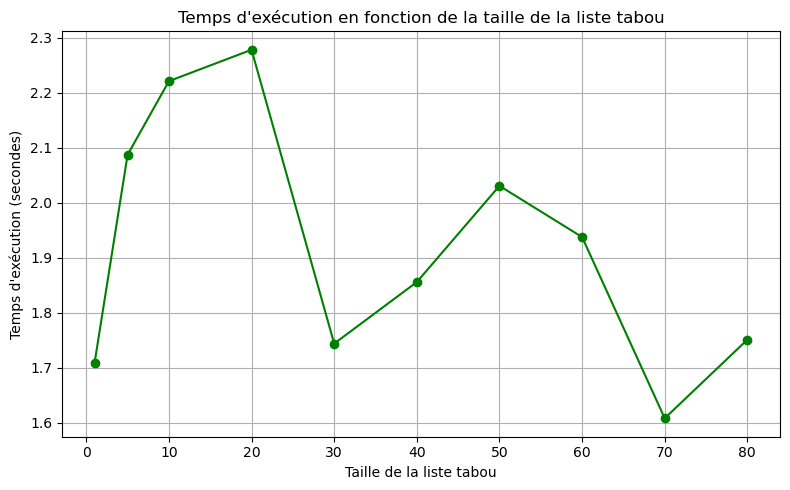

In [ ]:
def time_vs_tabu_list_size(graph_generator, algorithm_class, tabu_sizes, max_iterations, node_count=20, blocked_edge_percentage=10, costly_edge_percentage=10):
    times = []
    for size in tabu_sizes:
        try:
            graph = graph_generator(
                node=node_count,
                blocked_edge_percentage=blocked_edge_percentage,
                costly_edge_percentage=costly_edge_percentage
            )
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.tabu_list_size = size  
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - taille liste tabou {size} : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec taille liste tabou {size} : {e}")
            times.append(None)
    Plot.plot_time_vs_tabu_size(tabu_sizes, times)


def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph

tabu_sizes = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80]

time_vs_tabu_list_size(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    tabu_sizes=tabu_sizes,
    max_iterations=50,
    node_count=30,  
    blocked_edge_percentage=10,
    costly_edge_percentage=10
)


Le graphique du temps d'éxécution en fonction de la taille de la liste tabou varie énormément, donc **la taille de la liste tabou n'a pas d'impact sur le temps d'éxécution**

# Variation du temps en fonction de la taille du nombre de véhicule

42d0923a-5570-420c-aa8c-fa843bc1ee85 - 1 véhicules : 14.6903 sec
d0591e1b-b63a-411b-bf70-f9e31ecb408d - 5 véhicules : 14.6927 sec
56067e1d-22b3-4ab2-9033-bbefd73229dc - 10 véhicules : 13.7699 sec
8e51df10-3910-4d0d-b86e-fb47543e00ea - 15 véhicules : 14.2557 sec
42a87e42-2e2c-4d45-823e-9122d4758479 - 20 véhicules : 12.6397 sec
760453a5-9500-422b-8fe6-ad167593770f - 25 véhicules : 13.8068 sec
38f8aa9e-8f39-4229-a5c8-bb8280ba0ec5 - 30 véhicules : 12.3692 sec
d99b95b2-a30d-4e45-ab7a-8de895c8fa21 - 35 véhicules : 10.8972 sec
d0408d35-0c98-4d88-817f-ca59c2154629 - 40 véhicules : 14.1908 sec
3acc375b-86fe-48af-bf37-b330d5716c0c - 45 véhicules : 14.8590 sec
8bd82bb2-ea8c-4e13-91ac-2b3139abc8b4 - 50 véhicules : 13.8216 sec


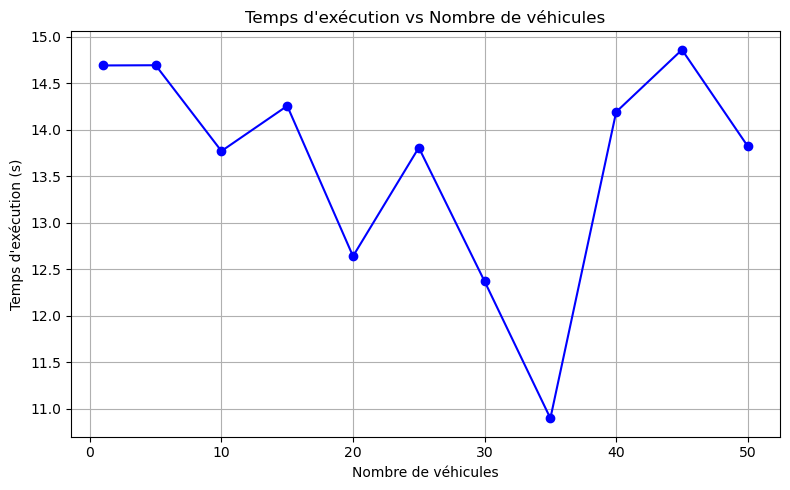

In [ ]:
def time_vs_vehicle_count(graph_generator, algorithm_class, vehicle_counts, max_iterations, node_count=30):
    times = []
    for v_count in vehicle_counts:
        try:
            graph = graph_generator(node=node_count)  # Génère un graphe fixe
            algorithm = algorithm_class(graph, max_iterations=max_iterations)
            algorithm.vehicle_count = v_count  # Suppose que ton algo accepte ce paramètre
            algorithm.convergence_threshold = 0
            algorithm.run()
            print(f"{algorithm.name} - {v_count} véhicules : {algorithm.execution_time:.4f} sec")
            times.append(algorithm.execution_time)
        except Exception as e:
            print(f"Erreur avec {v_count} véhicules : {e}")
            times.append(None)
    # Tracer les résultats
    Plot.plot_time_vs_vehicle_count(vehicle_counts, times)


def graph_generator(node=10, minimum_weight=1, maximum_weight=100, blocked_edge_percentage=0, costly_edge_percentage=0):
    # Graph generation
    graph = RandomGraph(node_number=node, min_weight=minimum_weight, max_weight=maximum_weight)
    # Filtration
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)
    return graph

vehicle_counts = [1, 5, 10, 15, 20, 25, 30, 35,40, 45, 50]

time_vs_vehicle_count(
    graph_generator=graph_generator,
    algorithm_class=lambda graph, max_iterations: TabuAlgo(graph, max_iterations=max_iterations),
    vehicle_counts=vehicle_counts,
    max_iterations=50,
    node_count=50  # Plus de nœuds pour un test plus réaliste avec plusieurs véhicules
)


Ce graphe du temps d'éxécution en fonction du nombre de véhicule nous **montre que le nombre de véhicule n'a pas d'impacte sur le temps d'exécution**. notre algorithme est donc optimisé quel que soit le nombre de véhicule.

#### Etude de trajectoire
Nous devons vérifier l'évolution de notre meilleur résultat au cours des itérations car nous devons nous assusurer de la qualité de notre solution. 

##### Variation de la distance en fonction du nombre d'itération (avec variation taille de graphes)



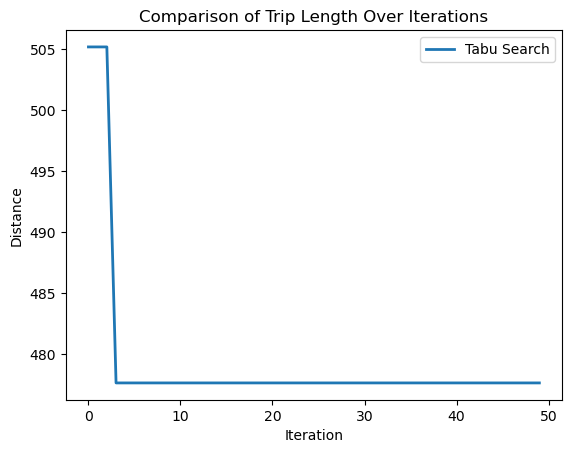

In [ ]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


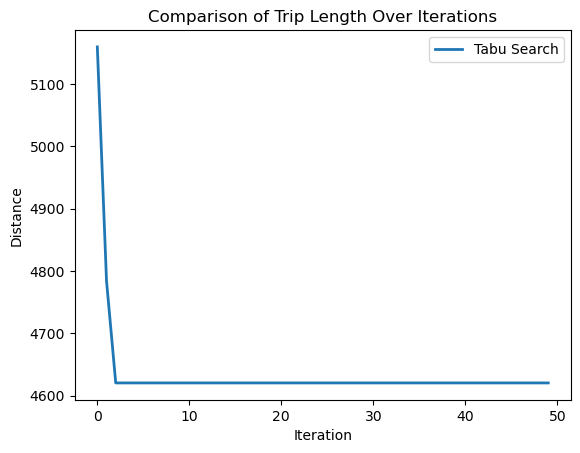

In [ ]:
# Graph generation
graph = RandomGraph(node_number=100,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


In [15]:
def get_iteration_over_node_size(max_node_number = 50, threshold = 20, step = 10):
    if(max_node_number < 6):
        max_node_number=6
    iterations = []
    iteration_range = range(10,max_node_number + 2, step)
    for i in iteration_range:
        graph = RandomGraph(node_number=i,min_weight=1,max_weight=100)
        TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=10)
        TABU.run()
        iterations.append(TABU.execution_time)
        print(f"{i} node step realized on {max_node_number}")
    Plot.plot_iterations_over_node_sizes(iterations)



get_iteration_over_node_size(max_node_number = 50, threshold = 20, step = 5)




10 node step realized on 50
15 node step realized on 50
20 node step realized on 50
25 node step realized on 50


KeyboardInterrupt: 

Avec les graphes de la variation de la distance trouvée par rapport au nombre d'itération on remarque que **plus le nombre de sommets est élevé plus un nombre d'itération est nécessaire pour trouver la solution optimale.**

# Variation de la distance en fonction de la taille de la liste tabou

In [ ]:
# --- Générateur de graphe ---
graph = RandomGraph(node_number=20, min_weight=1, max_weight=100)
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

min_iterations = 20
max_iterations = 20
convergence_threshold = 20
num_vehicles = 3
tabu_sizes = [1, 3, 5, 10, 15]
repeat = 5
results = []

for size in tabu_sizes:
    distances = []
    print(f"\n--- Taille de la liste tabou : {size} ---")
    for _ in range(repeat):
        try:
            g = RandomGraph(node_number=100, min_weight=1, max_weight=100)
            g.apply_edge_blocking(percentage=0)
            g.apply_edge_costly(percentage=0)

            tabu = TabuAlgo(
                graph=g,
                name="Tabu Search",
                size_tabou=size,
                num_vehicles=num_vehicles,
                min_iterations=min_iterations,
                max_iterations=max_iterations,
                convergence_threshold=convergence_threshold
            )

            tabu.run()
            best_distance = tabu.calculate_distance(tabu.solution)
            print(f"  → Distance : {best_distance:.2f}")
            distances.append(best_distance)
        except Exception as e:
            print(f"  [Erreur] : {e}")

    if distances:
        avg_distance = sum(distances) / len(distances)
        print(f">>> Moyenne pour taille {size} : {avg_distance:.2f}")
        results.append(avg_distance)
    else:
        print(f">>> Aucune solution valide pour taille {size}")
        results.append(None)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(tabu_sizes, results, marker='o', linestyle='-', color='teal')
plt.title("Variation de la solution en fonction de la taille de la liste tabou")
plt.xlabel("Taille de la liste tabou")
plt.ylabel("Distance moyenne trouvée")
plt.grid(True)
plt.tight_layout()
plt.show()



--- Taille de la liste tabou : 1 ---




## Métaheuristique 2 : Algorithme des colonies de fourmis
### Modélisation algorthmique   

### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration



## Métaheuristique 3 : Algorithme génétique
### Modélisation algorthmique   
### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration




# Étude statistique – Conclusion
L'objectif de cette étude statistique était de déterminer quel algorithme est le plus adapté à notre problème. Pour cela, nous avons comparé plusieurs algorithmes à travers de multiples itérations sur des problèmes similaires, afin d'identifier celui qui est le plus rapide à trouver une solution et celui qui fournit les résultats les plus optimisés.

Nous avons calculé la moyenne et l’écart type des résultats optimaux obtenus par chaque algorithme, ce qui nous a permis de visualiser leurs performances à l’aide de diagrammes en boîte (voir ci-dessus).

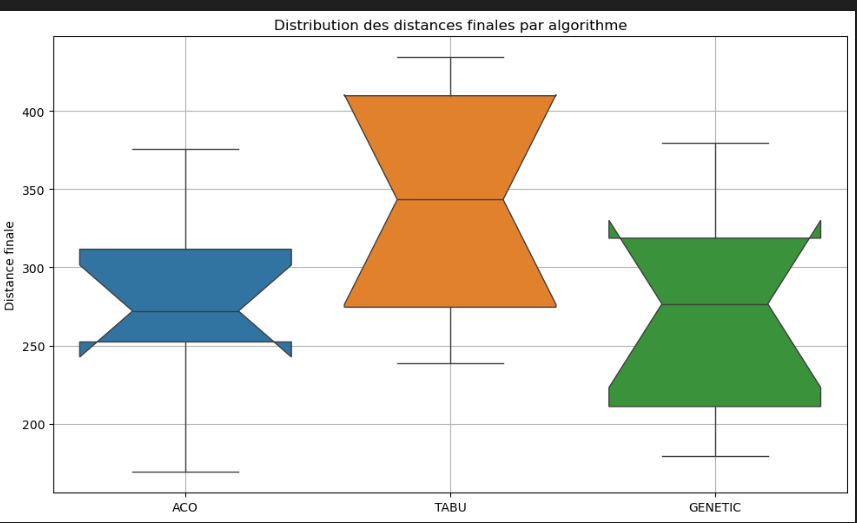
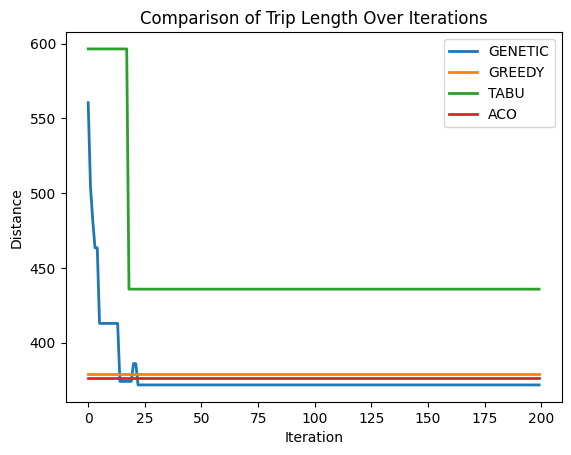

À l’issue de ces expérimentations, nous pouvons conclure que l’algorithme génétique est celui qui, après de nombreuses itérations, parvient le plus souvent à une solution optimale. Cependant, ses résultats manquent de régularité : il présente une grande variabilité entre les solutions qu’il considère comme optimales à différents instants.

Sur ce point, l’algorithme des fourmis se distingue par sa stabilité. Comme le montrent les diagrammes en boîte, ses résultats sont généralement plus constants et souvent proches de l’optimum. Il constitue donc un meilleur choix si la régularité des performances est un critère important.



# Bibliographie
* [TSP wiki](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)
* [(TSP) exemple](https://docs.mosek.com/latest/dotnetfusion/case-studies-tsp.html)
* [VRP](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_tourn%C3%A9es_de_v%C3%A9hicules)

* [Réductions polynomiales](https://datamove.imag.fr/denis.trystram/SupportsDeCours/lesson4reductions.pdf)

* [Les 21 problèmes NP-complets de Karp](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)

* [The Complexity of Theorem-Proving Procedures](https://www.inf.unibz.it/~calvanese/teaching/14-15-tc/material/cook-1971-NP-completeness-of-SAT.pdf)

* [REDUCIBILITY AMONG COMBINATORIAL PROBLEM](https://cgi.di.uoa.gr/~sgk/teaching/grad/handouts/karp.pdf)

